In [2]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

Text(0, 0.5, 'y dataset')

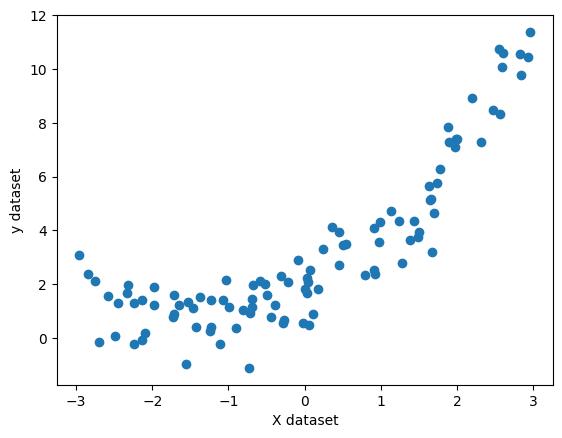

In [27]:
# create sample data
X = 6*np.random.rand(100,1) - 3

#use quadratic equation to create y y = 0.5*X**2 + X + 2 + noise
y = 0.5*X**2 +1.5*X + 2 + np.random.randn(100,1)

plt.scatter(X, y)
plt.xlabel('X dataset')
plt.ylabel('y dataset')

In [4]:
#train test split

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
#Simple Linear Regression
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()

In [6]:
lin_reg.fit(X_train, y_train)

LinearRegression()

In [7]:
#r2 score
from sklearn.metrics import r2_score
y_pred = lin_reg.predict(X_test)
r2_score(y_test, y_pred)

0.6947314150595636

Text(0, 0.5, 'y dataset')

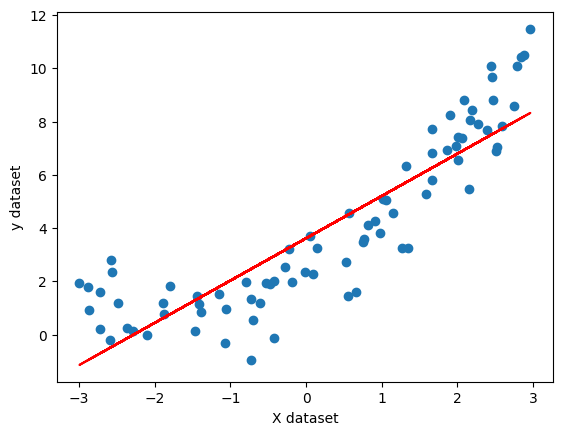

In [8]:
#visualise the model
plt.plot(X_train, lin_reg.predict(X_train), color='red')
plt.scatter(X_train, y_train)
plt.xlabel('X dataset')
plt.ylabel('y dataset')

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

## Polynomial Regression

Polynomial Regression is a form of regression analysis in which the relationship between the independent variable \(X\) and the dependent variable \(y\) is modeled as an \(n\)th degree polynomial. Polynomial regression fits a nonlinear relationship between the value of \(X\) and the corresponding conditional mean of \(y\).

### Why Polynomial Regression?

Linear regression is limited to modeling linear relationships, which means it cannot capture the complexities of more intricate data patterns. Polynomial regression, on the other hand, can model curves in the data, making it more flexible and capable of fitting a wider range of data patterns.

### Polynomial Regression Equation

The polynomial regression equation is given by:

\[ y = b_0 + b_1X + b_2X^2 + b_3X^3 + \ldots + b_nX^n \]

where:
- \(y\) is the dependent variable.
- \(X\) is the independent variable.
- \(b_0, b_1, b_2, \ldots, b_n\) are the coefficients of the polynomial.

### Methods to Perform Polynomial Regression

1. **Using PolynomialFeatures from sklearn.preprocessing**:
    - This method involves transforming the original features into polynomial features of a specified degree and then applying linear regression on these transformed features.

    ```python

    # Create polynomial features
    poly_features = PolynomialFeatures(degree=2)
    X_poly = poly_features.fit_transform(X)

    # Fit the model
    poly_reg_model = LinearRegression()
    poly_reg_model.fit(X_poly, y)

    # Predict
    y_poly_pred = poly_reg_model.predict(X_poly)
    ```

2. **Using Pipeline**:
    - A more streamlined approach is to use a pipeline to combine the polynomial feature transformation and the linear regression model.

    ```python
    # Create a pipeline that first transforms the features and then fits the model
    poly_pipeline = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())

    # Fit the model
    poly_pipeline.fit(X, y)

    # Predict
    y_poly_pred = poly_pipeline.predict(X)
    ```

### Visualizing Polynomial Regression

To visualize the polynomial regression model, you can plot the original data points and the polynomial regression curve.


In [9]:
#lets apply
from sklearn.preprocessing import PolynomialFeatures

In [10]:
poly = PolynomialFeatures(degree=2, include_bias=True)

#htheta(x) = theta0 + theta1*x1 + theta2*x2 
# x1 = x, x2 = x**2
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)  #test data should be transformed using the same poly object to be    completely new and unseen data to avoid data leakage

In [11]:
print(X_train_poly[0])   #first value is 1, second value is x, third value is x**2 for degree 2

[ 1.         -2.57222173  6.61632461]


In [12]:
#rsquare
poly_reg = LinearRegression()
poly_reg.fit(X_train_poly, y_train)
y_pred = poly_reg.predict(X_test_poly)
r2_score(y_test, y_pred)

0.9163298126407372

In [13]:
print(poly_reg.coef_, poly_reg.intercept_)

[[0.        1.546856  0.4319869]] [2.21101044]


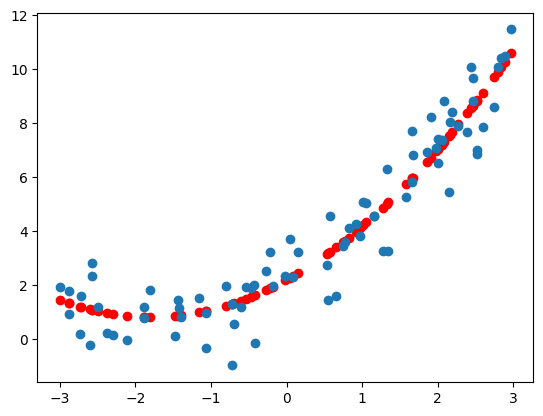

In [14]:
plt.scatter(X_train, poly_reg.predict(X_train_poly), color='red')
plt.scatter(X_train, y_train)

In [15]:
#with degree 3
poly = PolynomialFeatures(degree=3, include_bias=True)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test) 

#accuracy
poly_reg = LinearRegression()
poly_reg.fit(X_train_poly, y_train)
y_pred = poly_reg.predict(X_test_poly)
r2_score(y_test, y_pred)

0.91277061000442

## Prediction of new dataset

In [17]:
X_new = np.linspace(-3,3,200).reshape(200,1)
X_new_poly = poly.transform(X_new)
X_new_poly.shape

(200, 4)

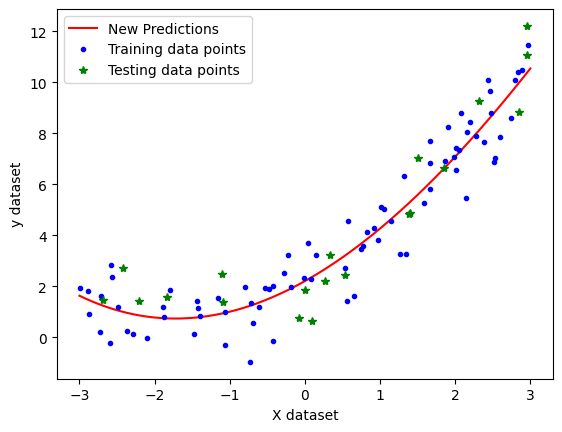

In [25]:
#prediction
y_new = poly_reg.predict(X_new_poly)

#visualise
plt.plot(X_new, y_new, color='red', label='New Predictions')
plt.plot(X_train, y_train, 'b.',label="Training data points")
plt.plot(X_test, y_test, 'g*', label='Testing data points')
plt.xlabel('X dataset')
plt.ylabel('y dataset')
plt.legend()